In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import product
from torch.nn import functional, MaxPool2d
from torch import Tensor
from PIL import Image

# **ECAL Channel**
---
Exploration of the electromagnetic calorimeter, which measures energy deposits from electromagnetic particles

In [2]:
random_jets = np.random.randint(0, 20000, 8)

## Raw images

In [3]:
batch_size: int = 10000
n_samples: int = 45000
n_batches: int = int(n_samples/batch_size)
jets_ECAL_gluon: np.array = np.empty((0, 125, 125))
pt_gluon: np.array = np.empty(0)

for i in range(n_batches):
    with h5py.File("/home/reyguadarrama/GSoC/data/quark-gluon_test-set_n139306.hdf5", 'r') as file:
        jets = file.get('X_jets')[batch_size*i:batch_size*(i+1)][:,:,:,1]
        moment_t = file.get('pt')[batch_size*i:batch_size*(i+1)]
        label = file.get('y')[batch_size*i:batch_size*(i+1)]

        indices_gluon = np.where(label == 0)[0]
        
        jets_ECAL_gluon = np.concatenate((jets_ECAL_gluon, jets[indices_gluon]))

        pt_gluon = np.concatenate((pt_gluon, moment_t[indices_gluon]))

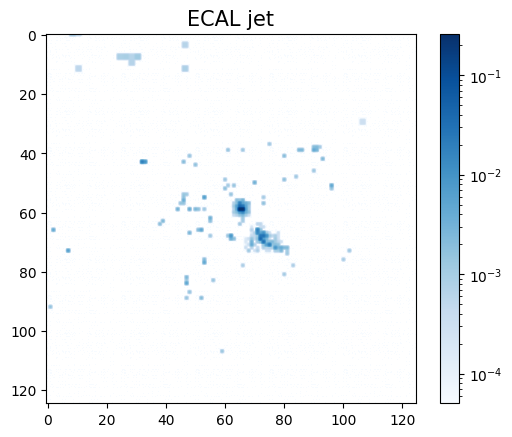

In [4]:
plt.imshow(jets_ECAL_gluon[1], cmap="Blues", norm=mcolors.LogNorm())
plt.title("ECAL jet", fontsize=15)
plt.colorbar()
plt.show()

In [5]:
# Sum of the energy deposits of all particles in each individual jet
total_energy_per_jet = np.sum(jets_ECAL_gluon, axis=(1, 2))

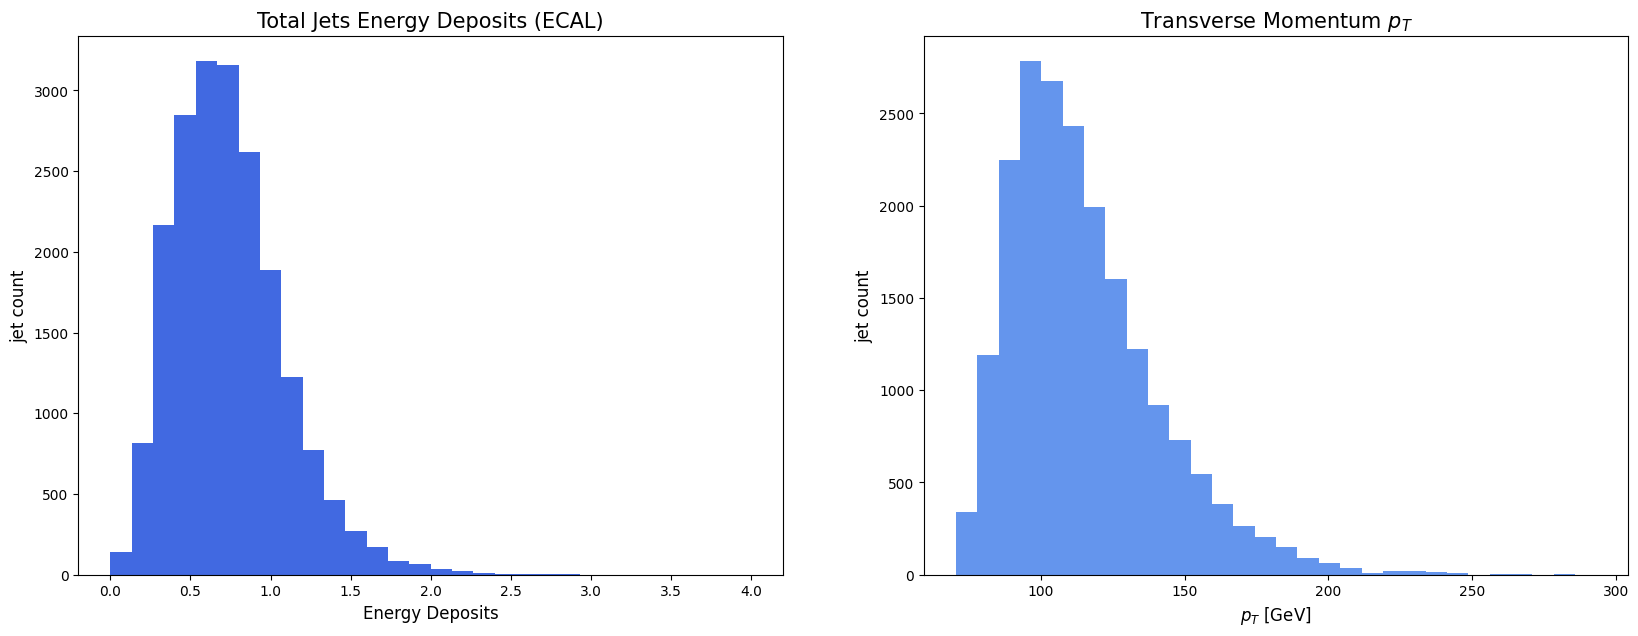

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7)) 

axs[0].hist(total_energy_per_jet, bins=30, range=(0, 4), color="royalblue")
axs[0].set_title("Total Jets Energy Deposits (ECAL)", fontsize=15)
axs[0].set_xlabel("Energy Deposits", fontsize=12)
axs[0].set_ylabel("jet count", fontsize=12)

axs[1].hist(pt_gluon, bins=30, color="cornflowerblue")
axs[1].set_title("Transverse Momentum $p_T$", fontsize=15)
axs[1].set_xlabel("$p_T$ [GeV]", fontsize=12)
axs[1].set_ylabel("jet count", fontsize=12)

plt.show()

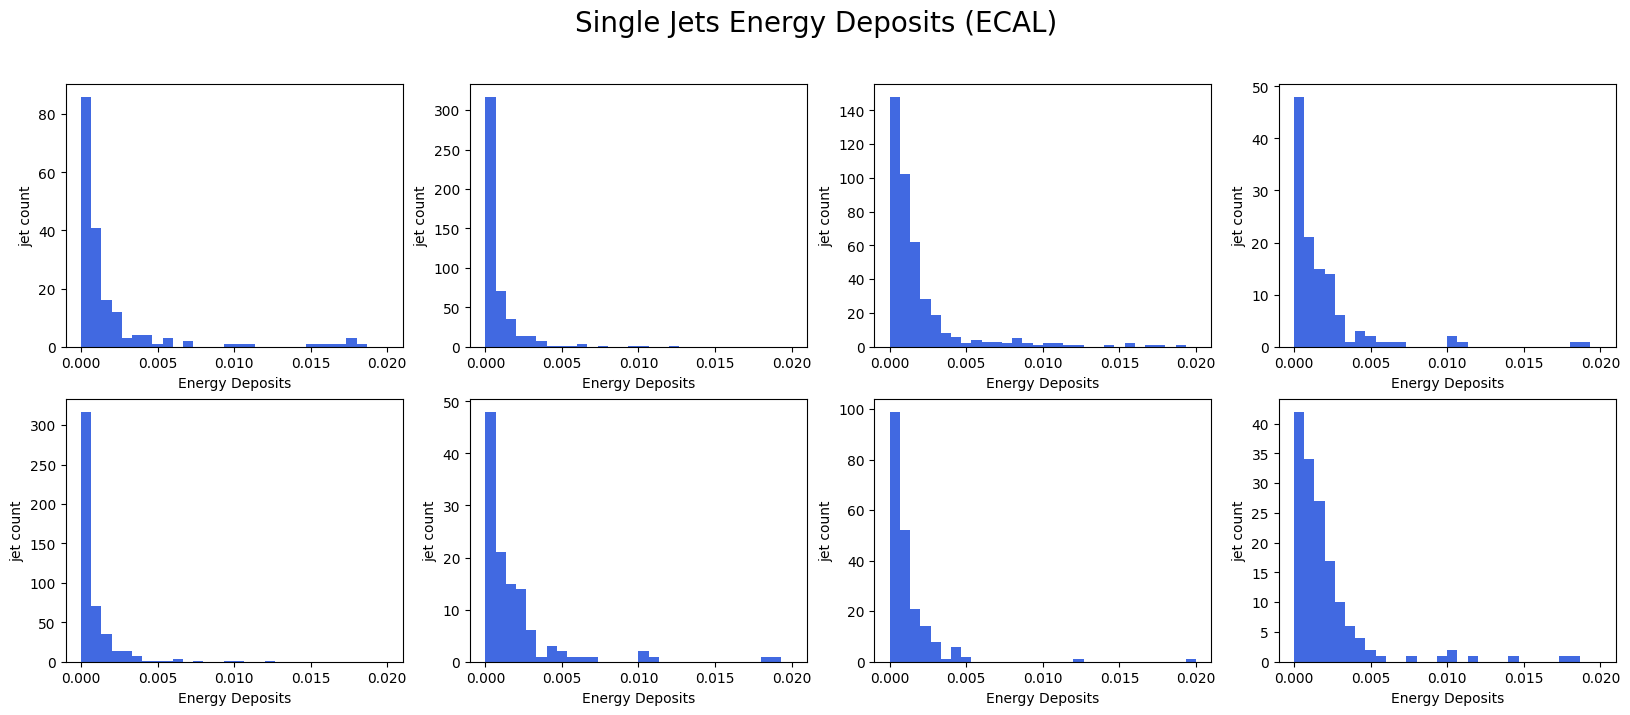

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(20, 7.5)) 

for i, j in product(range(2), range(4)):
    jet = random_jets[(i+1)*(j+1) - 1]
    jet_energy_deposits = jets_ECAL_gluon[jet][jets_ECAL_gluon[jet] != 0]

    axs[i, j].hist(jet_energy_deposits, bins=30, range=(0, 0.02), color="royalblue")
    axs[i, j].set_xlabel("Energy Deposits")
    axs[i, j].set_ylabel("jet count")

plt.suptitle(f"Single Jets Energy Deposits (ECAL)", fontsize=20)
plt.show()

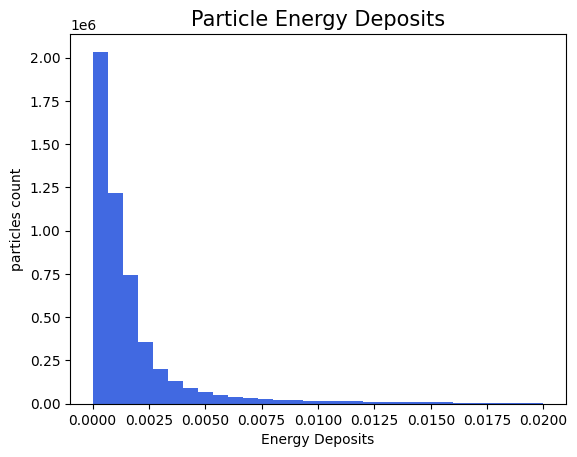

In [69]:
# energy deposits of all individual particle in every jet
particles_energy_deposits = jets_ECAL_gluon[jets_ECAL_gluon != 0]

plt.hist(particles_energy_deposits, bins=30, range=(0, 0.02), color="royalblue")
plt.title("Particle Energy Deposits", fontsize=15)
plt.xlabel("Energy Deposits")
plt.ylabel("particles count")
plt.show()

## Cropped images

In [9]:
cropped_jets_ECAL_gluon = jets_ECAL_gluon[:,22:102, 22:102]

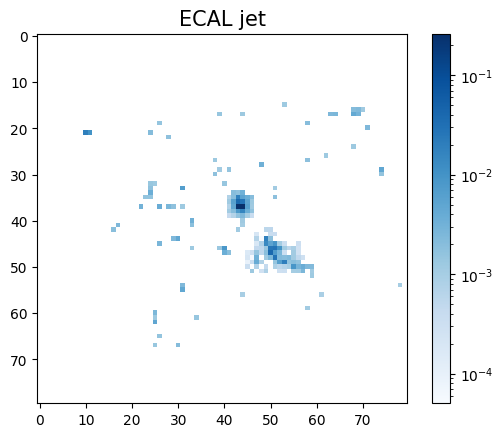

In [10]:
plt.imshow(cropped_jets_ECAL_gluon[1], cmap="Blues", norm=mcolors.LogNorm())
plt.title("ECAL jet", fontsize=15)
plt.colorbar()
plt.show()

In [11]:
# Sum of the energy deposits of all particles in each individual jet
total_energy_per_cropped_jet = np.sum(cropped_jets_ECAL_gluon, axis=(1, 2))

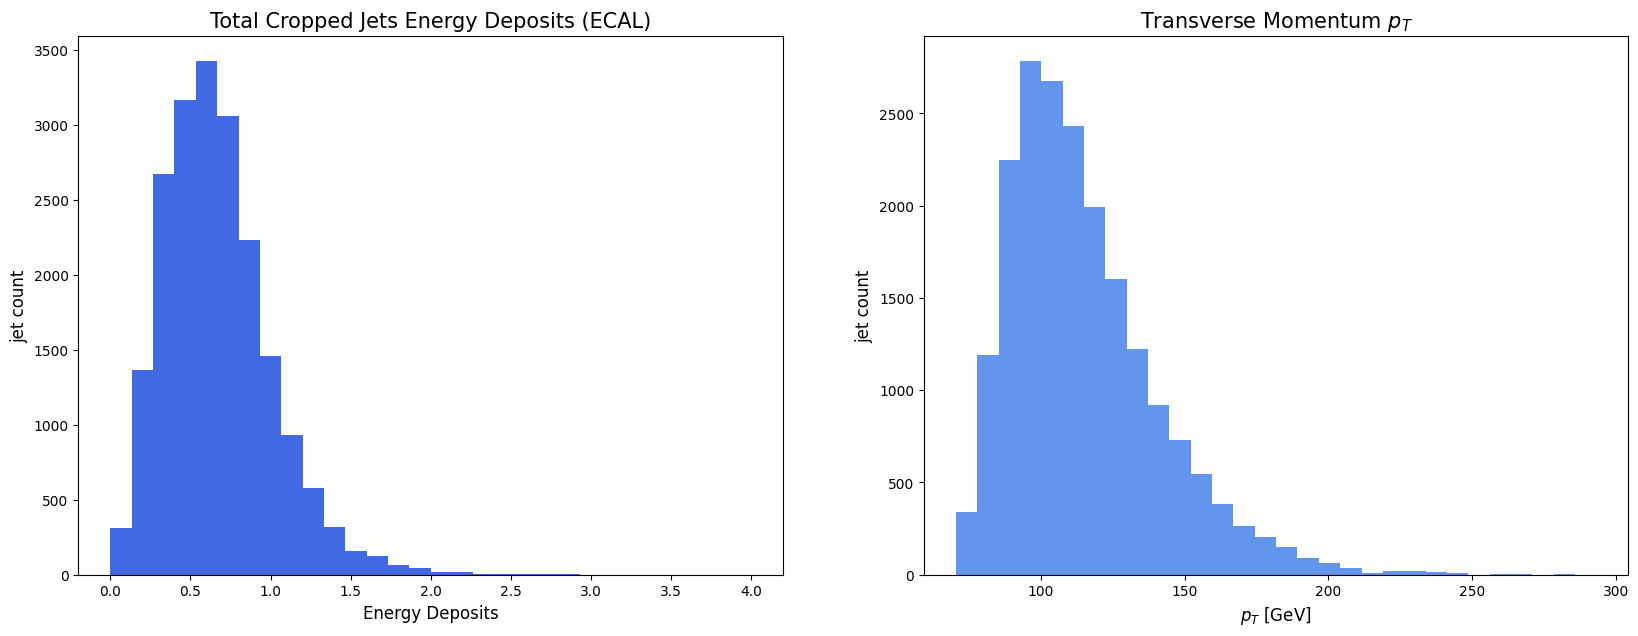

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7)) 

axs[0].hist(total_energy_per_cropped_jet, bins=30, range=(0, 4), color="royalblue")
axs[0].set_title("Total Cropped Jets Energy Deposits (ECAL)", fontsize=15)
axs[0].set_xlabel("Energy Deposits", fontsize=12)
axs[0].set_ylabel("jet count", fontsize=12)

axs[1].hist(pt_gluon, bins=30, color="cornflowerblue")
axs[1].set_title("Transverse Momentum $p_T$", fontsize=15)
axs[1].set_xlabel("$p_T$ [GeV]", fontsize=12)
axs[1].set_ylabel("jet count", fontsize=12)

plt.show()

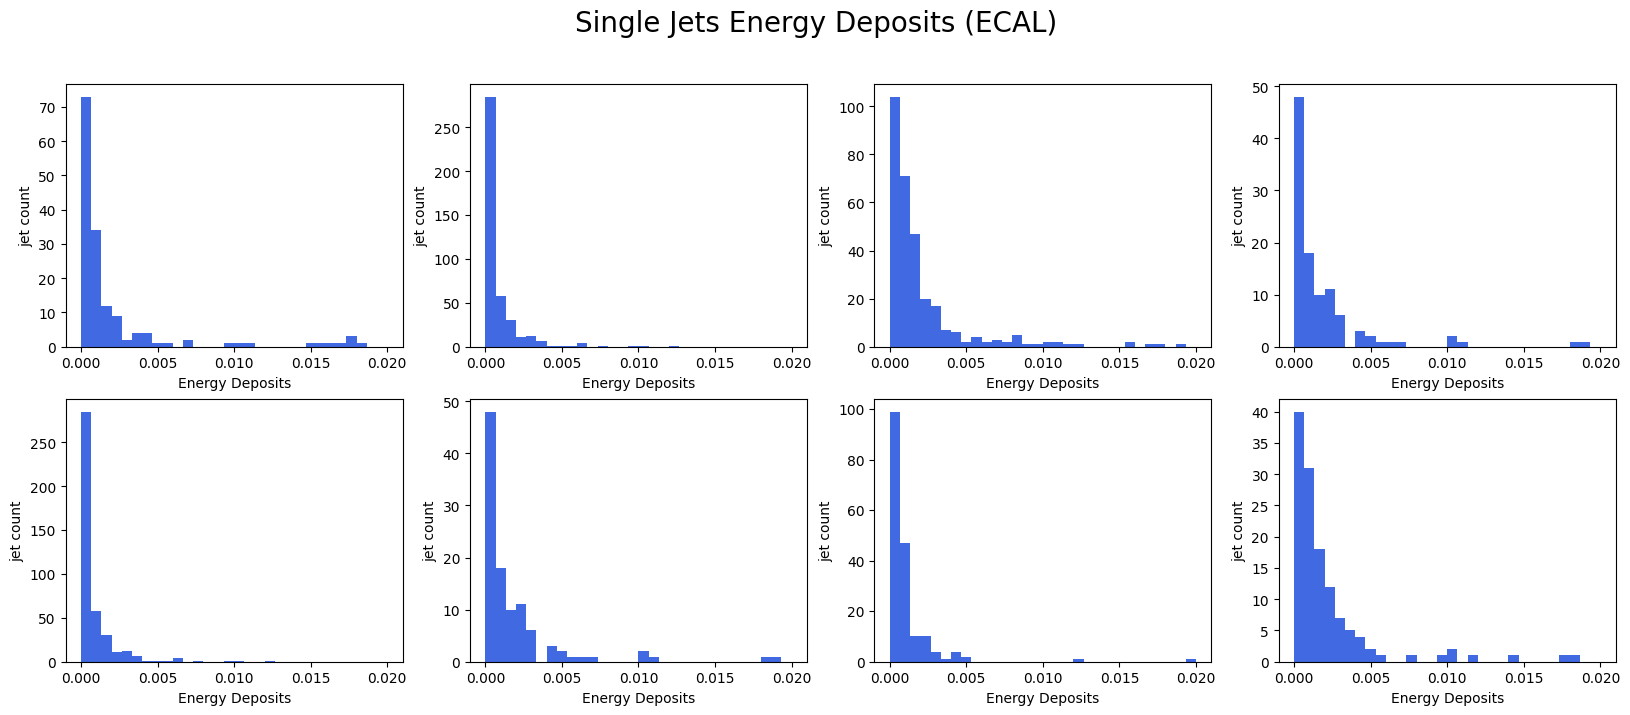

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(20, 7.5)) 

for i, j in product(range(2), range(4)):
    jet = random_jets[(i+1)*(j+1) - 1]
    cropped_jet_energy_deposits = cropped_jets_ECAL_gluon[jet][cropped_jets_ECAL_gluon[jet] != 0]

    axs[i, j].hist(cropped_jet_energy_deposits, bins=30, range=(0, 0.02), color="royalblue")
    axs[i, j].set_xlabel("Energy Deposits")
    axs[i, j].set_ylabel("jet count")

plt.suptitle(f"Single Jets Energy Deposits (ECAL)", fontsize=20)
plt.show()

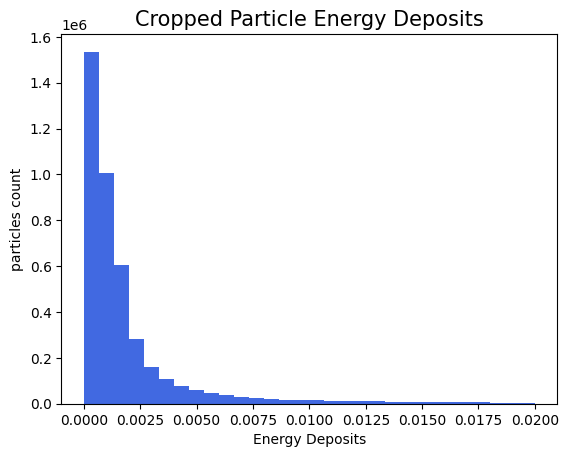

In [52]:
# energy deposits of all individual particle in every jet
cropped_particles_energy_deposits = cropped_jets_ECAL_gluon[cropped_jets_ECAL_gluon != 0]

plt.hist(cropped_particles_energy_deposits, bins=30, range=(0, 0.02), color="royalblue")
plt.title("Cropped Particle Energy Deposits", fontsize=15)
plt.xlabel("Energy Deposits")
plt.ylabel("particles count")
plt.show()

## Cropped and Resized Images

#### **Bilinear interpolation**

In [15]:
bilinear_jets_ECAL_gluon = (functional.interpolate(Tensor(cropped_jets_ECAL_gluon).unsqueeze(1), size=(8, 8), mode="bilinear", antialias=True)).squeeze(1).numpy()

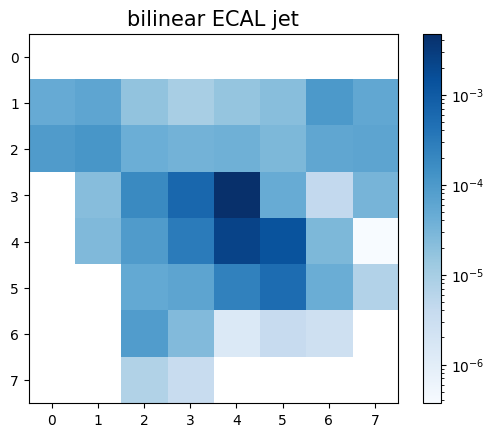

In [16]:
plt.imshow(bilinear_jets_ECAL_gluon[1], cmap="Blues", norm=mcolors.LogNorm())
plt.title("bilinear ECAL jet", fontsize=15)
plt.colorbar()
plt.show()

In [41]:
bilinear_jets_total_energy = np.sum(bilinear_jets_ECAL_gluon, axis=(1, 2))
bilinear_particles_energy_deposits = bilinear_jets_ECAL_gluon[bilinear_jets_ECAL_gluon != 0]

#### **Bicubic Interpolation**

In [18]:
bicubic_jets_ECAL_gluon = (functional.interpolate(Tensor(cropped_jets_ECAL_gluon).unsqueeze(1), size=(8, 8), mode="bicubic", antialias=True)).squeeze(1).numpy()

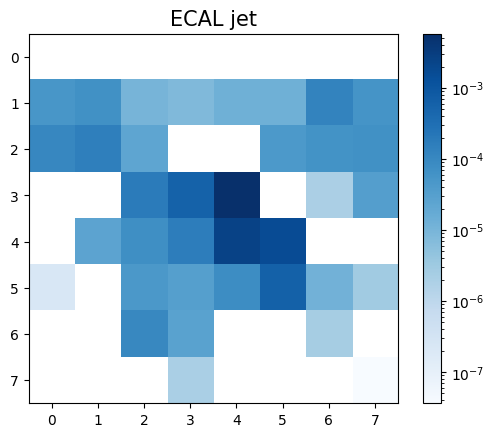

In [19]:
plt.imshow(bicubic_jets_ECAL_gluon[1], cmap="Blues", norm=mcolors.LogNorm())
plt.title("ECAL jet", fontsize=15)
plt.colorbar()
plt.show()

In [42]:
bicubic_jets_total_energy = np.sum(bicubic_jets_ECAL_gluon, axis=(1, 2))
bicubic_particles_energy_deposits = bicubic_jets_ECAL_gluon[bicubic_jets_ECAL_gluon != 0]

#### **Max Pooling**

In [21]:
m = MaxPool2d(10, stride=10)
maxpool_jets_ECAL_gluon = (m(Tensor(cropped_jets_ECAL_gluon).unsqueeze(1))).squeeze(1).numpy()

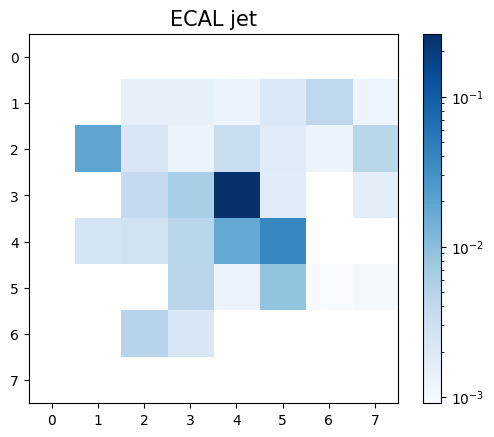

In [22]:
plt.imshow(maxpool_jets_ECAL_gluon[1], cmap="Blues", norm=mcolors.LogNorm())
plt.title("ECAL jet", fontsize=15)
plt.colorbar()
plt.show()

In [43]:
maxpool_jets_total_energy = np.sum(maxpool_jets_ECAL_gluon, axis=(1, 2))
maxpool_particles_energy_deposits = maxpool_jets_ECAL_gluon[maxpool_jets_ECAL_gluon != 0]

#### **Sum Pooling**

In [24]:
def sum_pooling(input, kernel_size):
    batch_size, channels, height, width = input.size()
    
    unfolded = functional.unfold(input, kernel_size=kernel_size, stride=kernel_size)
    
    summed = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1).sum(dim=2)
    
    output = summed.view(batch_size, channels, height // kernel_size, width // kernel_size)
    
    return output

sumpool_jets_ECAL_gluon = sum_pooling(Tensor(cropped_jets_ECAL_gluon).unsqueeze(1), kernel_size=10).squeeze(1).numpy()


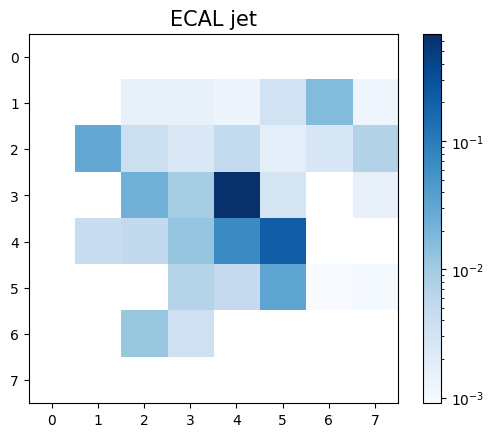

In [25]:
plt.imshow(sumpool_jets_ECAL_gluon[1], cmap="Blues", norm=mcolors.LogNorm())
plt.title("ECAL jet", fontsize=15)
plt.colorbar()
plt.show()

In [46]:
sumpool_jets_total_energy = np.sum(sumpool_jets_ECAL_gluon, axis=(1, 2))
sumpool_particles_energy_deposits = sumpool_jets_ECAL_gluon[sumpool_jets_ECAL_gluon != 0]

#### **Max-Min Normalization**

In [27]:
normalized_jets_ECAL_gluon = np.empty_like(sumpool_jets_ECAL_gluon)

for i in range(sumpool_jets_ECAL_gluon.shape[0]):
    data_min = np.min(sumpool_jets_ECAL_gluon[i])
    data_max = np.max(sumpool_jets_ECAL_gluon[i])
    if data_max != 0:
        normalized_jets_ECAL_gluon[i] = (sumpool_jets_ECAL_gluon[i] - data_min) / (data_max - data_min)

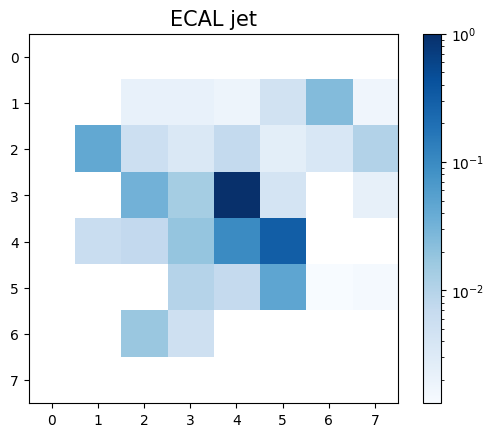

In [28]:
plt.imshow(normalized_jets_ECAL_gluon[1], cmap="Blues", norm=mcolors.LogNorm())
plt.title("ECAL jet", fontsize=15)
plt.colorbar()
plt.show()

In [44]:
normalized_jets_total_energy = np.sum(normalized_jets_ECAL_gluon, axis=(1, 2))
normalized_particles_energy_deposits = normalized_jets_ECAL_gluon[normalized_jets_ECAL_gluon != 0]

### **Comparison**

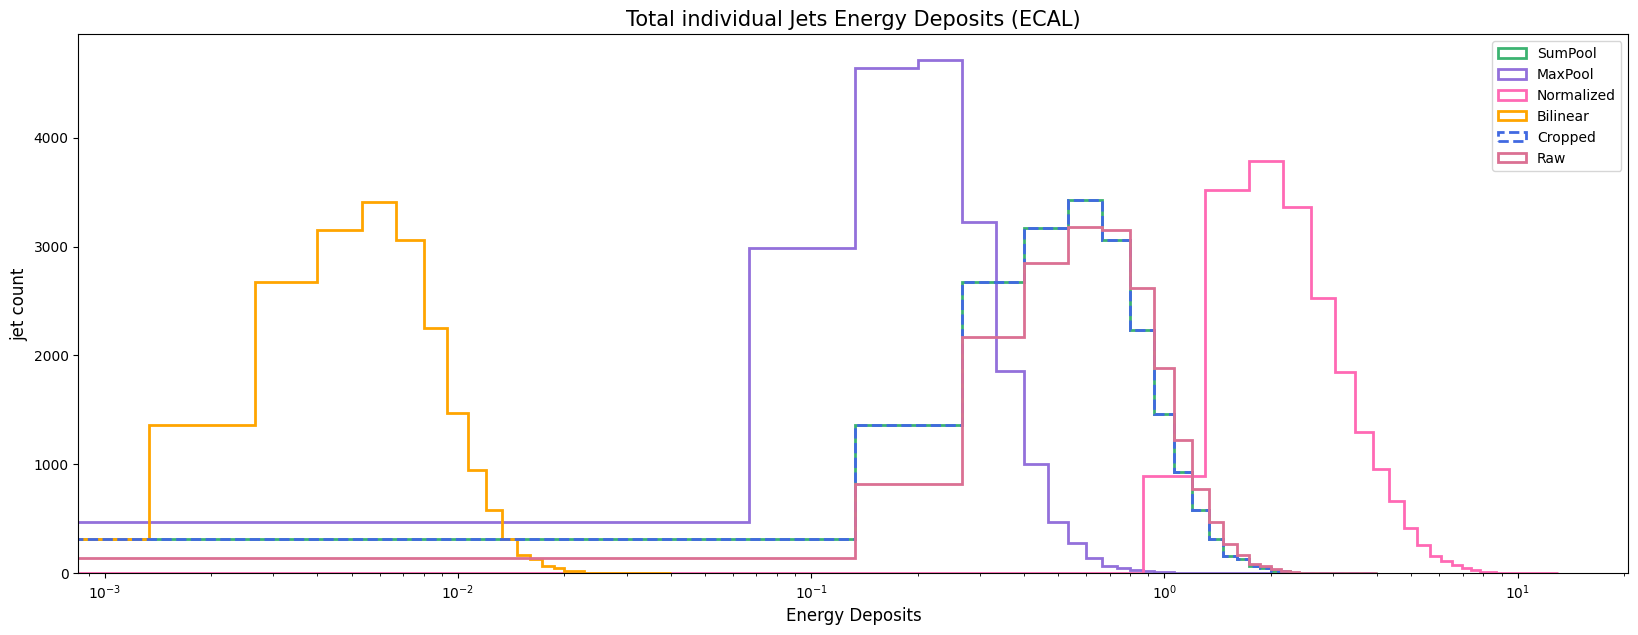

In [30]:
fig, ax = plt.subplots(1, figsize=(20, 7)) 

ax.hist(sumpool_jets_total_energy, bins=30, range=(0, 4), label="SumPool", histtype="step", linewidth=2, color="mediumseagreen")
ax.hist(maxpool_jets_total_energy, bins=30, range=(0, 2), label="MaxPool", histtype="step", linewidth=2, color="mediumpurple")
ax.hist(normalized_jets_total_energy, bins=30, range=(0, 13), label="Normalized", histtype="step", linewidth=2, color="hotpink")
ax.hist(bilinear_jets_total_energy, bins=30, range=(0, 0.04), label="Bilinear", histtype="step", linewidth=2, color="orange")
ax.hist(total_energy_per_cropped_jet, bins=30, range=(0, 4), label="Cropped", histtype="step", linewidth=2, linestyle="--", color="royalblue")
ax.hist(total_energy_per_jet, bins=30, range=(0, 4), label="Raw", histtype="step", linewidth=2, color="palevioletred")
ax.set_xscale("log")
ax.set_title("Total individual Jets Energy Deposits (ECAL)", fontsize=15)
ax.set_xlabel("Energy Deposits", fontsize=12)
ax.set_ylabel("jet count", fontsize=12)

plt.legend()
plt.show()

In [95]:
np.histogram(sumpool_particles_energy_deposits, range=(0, 0.02), density=True)

(array([160.96334404, 134.02999719,  67.88248193,  41.37781661,
         28.2030482 ,  19.99354109,  15.47838245,  12.65782677,
         10.50175688,   8.91179595]),
 array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
        0.018, 0.02 ], dtype=float32))

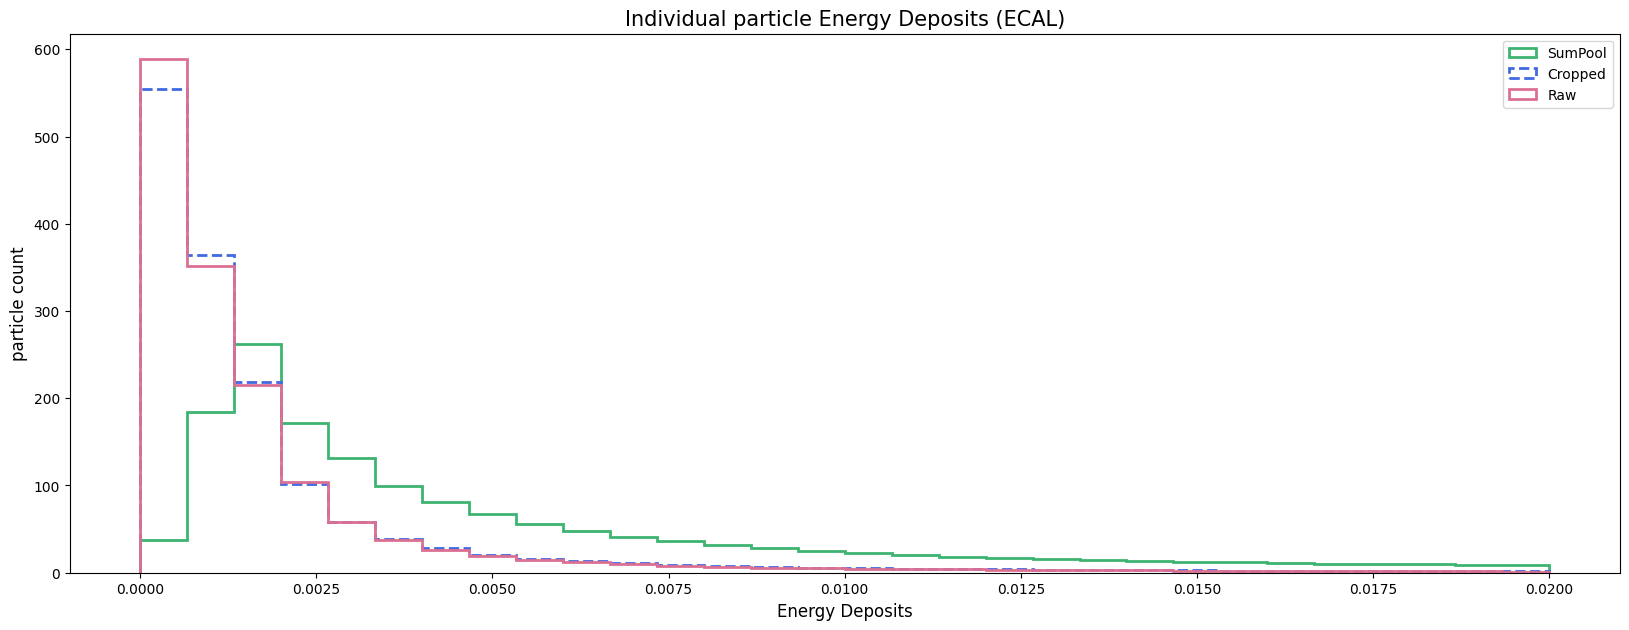

In [101]:
fig, ax = plt.subplots(1, figsize=(20, 7)) 

ax.hist(sumpool_particles_energy_deposits, bins=30, range=(0, 0.02), label="SumPool", histtype="step", linewidth=2, color="mediumseagreen", density=True)
#ax.hist(maxpool_particles_energy_deposits, bins=30, range=(0, 0.02), label="MaxPool", histtype="step", linewidth=2, color="mediumpurple", density=True)
#ax.hist(normalized_particles_energy_deposits, bins=30, range=(0, 0.05), label="Normalized", histtype="step", linewidth=2, color="hotpink", density=True)
#x.hist(bilinear_particles_energy_deposits, bins=30, range=(0, 0.02), label="Bilinear", histtype="step", linewidth=2, color="orange", density=True)
ax.hist(cropped_particles_energy_deposits, bins=30, range=(0, 0.02), label="Cropped", histtype="step", linewidth=2, linestyle="--", color="royalblue", density=True)
ax.hist(particles_energy_deposits, bins=30, range=(0, 0.02), label="Raw", histtype="step", linewidth=2, color="palevioletred", density=True)
#ax.set_xscale("log")
ax.set_title("Individual particle Energy Deposits (ECAL)", fontsize=15)
ax.set_xlabel("Energy Deposits", fontsize=12)
ax.set_ylabel("particle count", fontsize=12)

plt.legend()
plt.show()

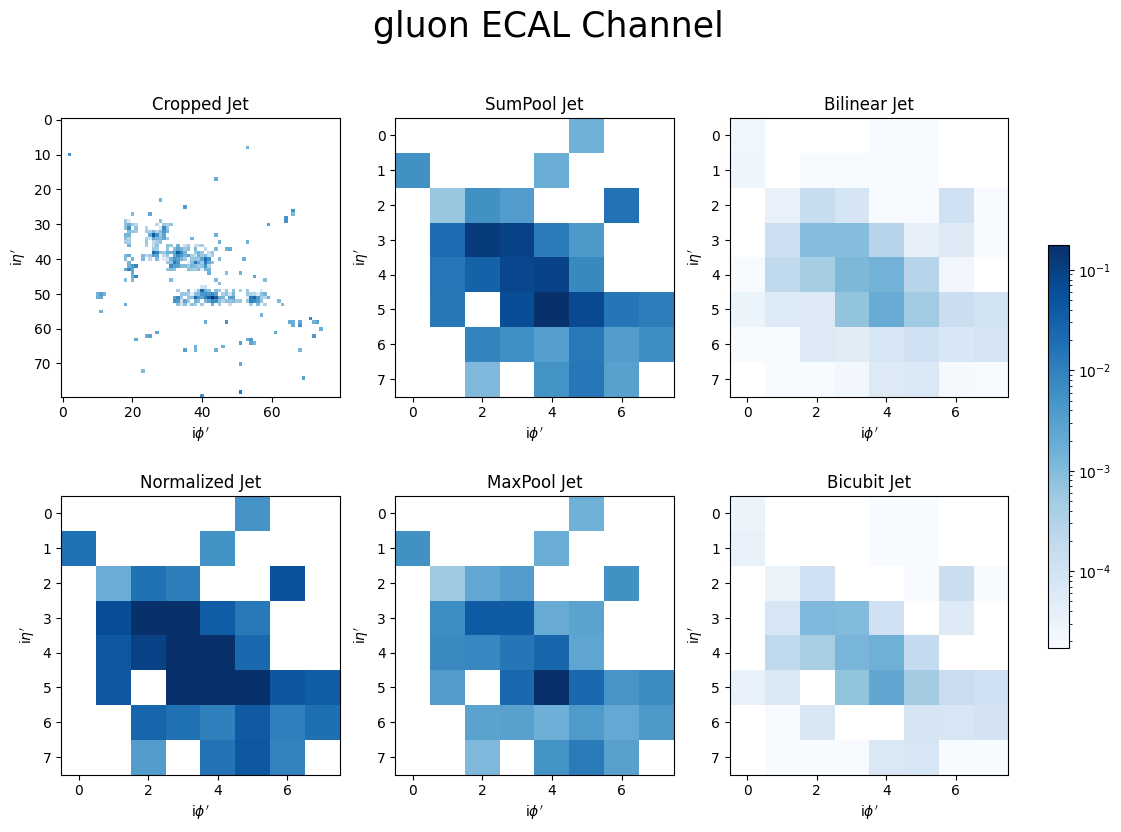

In [38]:
norm = mcolors.LogNorm()

fig, axs = plt.subplots(2, 3, figsize=(13, 9)) 

im1 = axs[0, 0].imshow(cropped_jets_ECAL_gluon[0], cmap="Blues", norm=norm)
axs[0, 0].set_title("Cropped Jet")


im2 = axs[1, 0].imshow(normalized_jets_ECAL_gluon[0], cmap="Blues", norm=norm)
axs[1, 0].set_title("Normalized Jet")


im3 = axs[0, 1].imshow(sumpool_jets_ECAL_gluon[0], cmap="Blues", norm=norm)
axs[0, 1].set_title("SumPool Jet")


im4 = axs[1, 1].imshow(maxpool_jets_ECAL_gluon[0], cmap="Blues", norm=norm)
axs[1, 1].set_title("MaxPool Jet")


im5 = axs[0, 2].imshow(bilinear_jets_ECAL_gluon[0], cmap="Blues", norm=norm)
axs[0, 2].set_title("Bilinear Jet")


im6 = axs[1, 2].imshow(bicubic_jets_ECAL_gluon[0], cmap="Blues", norm=norm)
axs[1, 2].set_title("Bicubit Jet")


for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.suptitle("gluon ECAL Channel", fontsize=25)
plt.show()

In [32]:
mean_cropped_jets_ECAL_gluon = np.mean(cropped_jets_ECAL_gluon, axis=0)
mean_normalized_jets_ECAL_gluon = np.mean(normalized_jets_ECAL_gluon, axis=0)
mean_sumpool_jets_ECAL_gluon = np.mean(sumpool_jets_ECAL_gluon, axis=0)
mean_maxpool_jets_ECAL_gluon = np.mean(maxpool_jets_ECAL_gluon, axis=0)
mean_bilinear_jets_ECAL_gluon = np.mean(bilinear_jets_ECAL_gluon, axis=0)
mean_bicubic_jets_ECAL_gluon = np.mean(bicubic_jets_ECAL_gluon, axis=0)

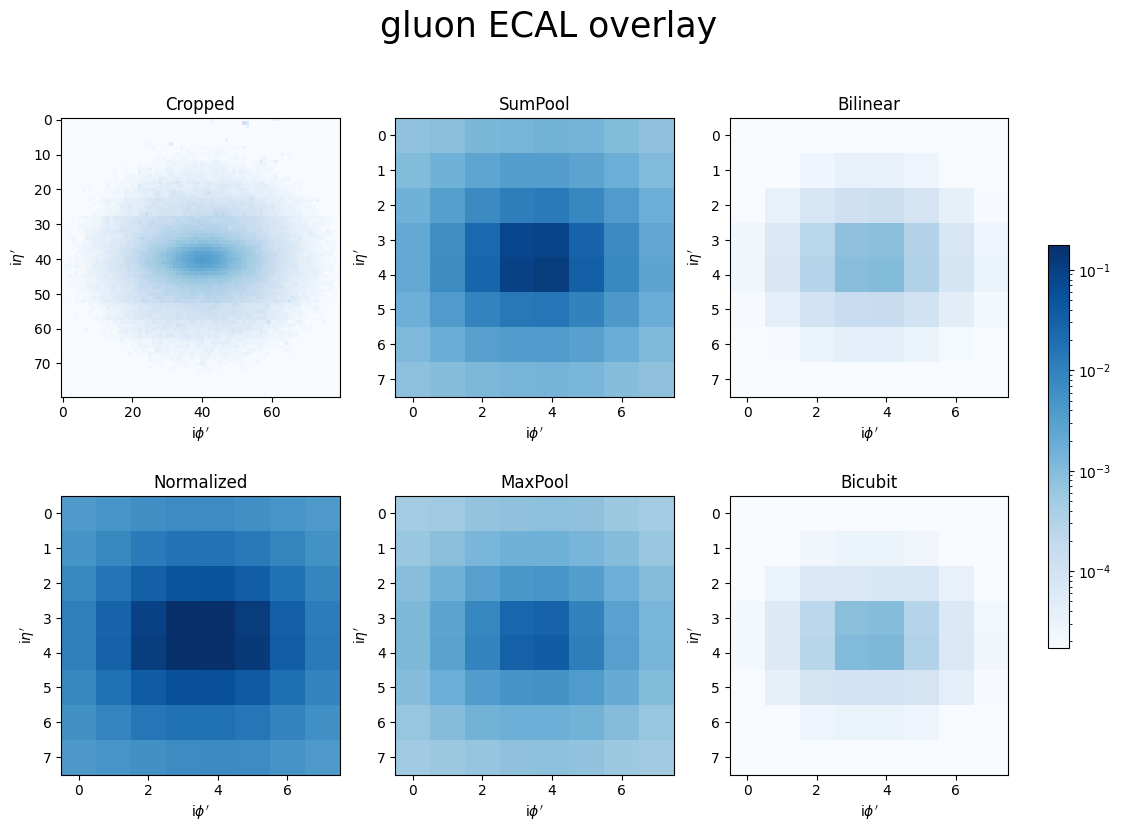

In [39]:

fig, axs = plt.subplots(2, 3, figsize=(13, 9)) 

im1 = axs[0, 0].imshow(mean_cropped_jets_ECAL_gluon, cmap="Blues", norm=norm)
axs[0, 0].set_title("Cropped")


im2 = axs[1, 0].imshow(mean_normalized_jets_ECAL_gluon, cmap="Blues", norm=norm)
axs[1, 0].set_title("Normalized")


im3 = axs[0, 1].imshow(mean_sumpool_jets_ECAL_gluon, cmap="Blues", norm=norm)
axs[0, 1].set_title("SumPool")


im4 = axs[1, 1].imshow(mean_maxpool_jets_ECAL_gluon, cmap="Blues", norm=norm)
axs[1, 1].set_title("MaxPool")


im5 = axs[0, 2].imshow(mean_bilinear_jets_ECAL_gluon, cmap="Blues", norm=norm)
axs[0, 2].set_title("Bilinear")


im6 = axs[1, 2].imshow(mean_bicubic_jets_ECAL_gluon, cmap="Blues", norm=norm)
axs[1, 2].set_title("Bicubit")


for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.suptitle("gluon ECAL overlay", fontsize=25)
plt.show()